# **Exercise 2, Advanced Deep Learning**

Eetu Karttunen

1. Tuning the learning rate and momentum of SGD optimizer as a baseline on CIFAR10 dataset with CNN implementation in Exercise 1, test the different sets of parameters and plot the best you have found, what is the influence of tuning different sets of parameters?

**Answer:**

From graph 1, it is possible to see how important the adjustment of the learning rate lr variable is in relation to both loss and accuracy. The best results were achieved with lr=0.01 and momentum 0.9. lr, changing the value from 0.01-> 0.001 seemed to make it smoother and slightly worse accuracy. On the other hand, if the momentum was greater than 0.9. it contributed to a significant collapse of the accuracy and the loss function results to a really bad result.

2. Apply RMSProp, AdaGrad and Adam optimizer to compare the differences with SGD optimizer in tuning the same parameters they share, explain your discovery as Task 1 asked.

**Answer:**

Figure 2 shows how clearly the best results were given by RMSprop.
AdaGrad gave a stronger initial value in both train and accuracy graphs, but soon lost in the compared RMSprop. Adam gave the overall worst accuracy. In particular, it is noticeable how all of these improve their results after increasing the epochs.


170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/10
1563/1563 [==============================] - 18s 6ms/step - loss: 1.6567 - accuracy: 0.3922 - val_loss: 1.4410 - val_accuracy: 0.4703
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2312 - accuracy: 0.5617 - val_loss: 1.1265 - val_accuracy: 0.5989
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0508 - accuracy: 0.6305 - val_loss: 1.1136 - val_accuracy: 0.6136
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9361 - accuracy: 0.6732 - val_loss: 0.9828 - val_accuracy: 0.6643
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8486 - accuracy: 0.7029 - val_loss: 1.0172 - val_accuracy: 0.6566
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7798 - accuracy: 0.7248 - val_loss: 0.9853 - val_accuracy: 0.6705
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step 

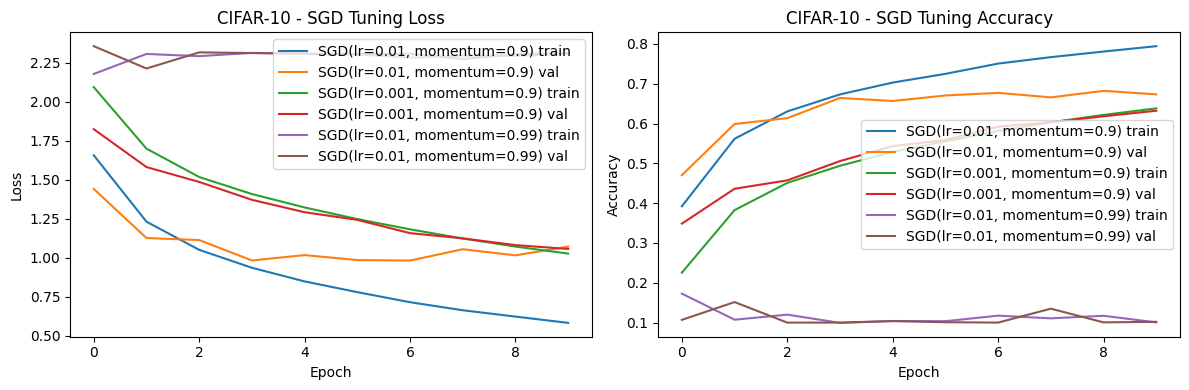

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5643 - accuracy: 0.4303 - val_loss: 1.3104 - val_accuracy: 0.5285
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1540 - accuracy: 0.5940 - val_loss: 1.0520 - val_accuracy: 0.6286
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9803 - accuracy: 0.6558 - val_loss: 0.9946 - val_accuracy: 0.6546
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8656 - accuracy: 0.6971 - val_loss: 0.9824 - val_accuracy: 0.6712
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7874 - accuracy: 0.7281 - val_loss: 0.9157 - val_accuracy: 0.6929
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7207 - accuracy: 0.7495 - val_loss: 0.8795 - val_accuracy: 0.7035
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6693 - accuracy: 0.7685 - val_loss: 0.9197 - val_accuracy

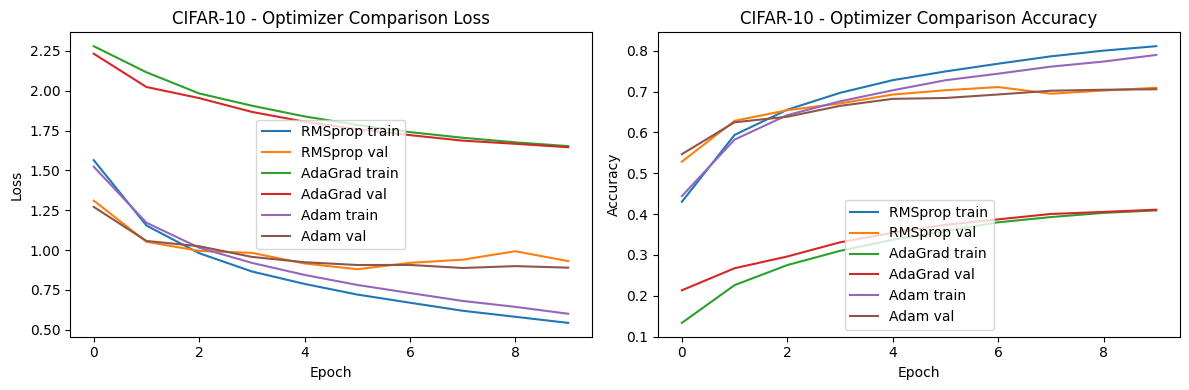

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Loading CIFAR-10
cifar10 = keras.datasets.cifar10
(trainImagesCifar, trainLabelsCifar), (testImagesCifar, testLabelsCifar) = cifar10.load_data()

# Normalizing pixel values between 0 and 1
trainImagesCifar, testImagesCifar = trainImagesCifar / 255.0, testImagesCifar / 255.0

# Training
def buildAndTrainCnn(activationFunction, optimizer, dataset, inputShape, numEpochs=10):
    model = keras.Sequential([
        Conv2D(32, (3, 3), activation=activationFunction, input_shape=inputShape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activationFunction),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activationFunction),
        Flatten(),
        Dense(64, activation=activationFunction),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(dataset[0], dataset[1], epochs=numEpochs,
                        validation_data=(dataset[2], dataset[3]))

    return history

# Visualizing the results
def plotResults(results, datasetName):
    plt.figure(figsize=(12, 4))

    for activationFunction, history in results.items():
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label=f'{activationFunction} train')
        plt.plot(history.history['val_loss'], label=f'{activationFunction} val')

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label=f'{activationFunction} train')
        plt.plot(history.history['val_accuracy'], label=f'{activationFunction} val')

    plt.subplot(1, 2, 1)
    plt.title(f'{datasetName} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title(f'{datasetName} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Task 2 - Tuning learning rate and momentum for SGD optimizer
sgdResults = {}
sgd_params = [(0.01, 0.9), (0.001, 0.9), (0.01, 0.99)]

for lr, momentum in sgd_params:
    sgd_optimizer = keras.optimizers.SGD(learning_rate=lr, momentum=momentum)
    sgdHistory = buildAndTrainCnn('relu', sgd_optimizer, (trainImagesCifar, trainLabelsCifar, testImagesCifar, testLabelsCifar), (32, 32, 3))
    sgdResults[f'SGD(lr={lr}, momentum={momentum})'] = sgdHistory

# Plotting results for SGD
plotResults(sgdResults, 'CIFAR-10 - SGD Tuning')

# Task 2 - Comparing RMSProp, AdaGrad, and Adam optimizers
rmsprop_optimizer = keras.optimizers.RMSprop()
adagrad_optimizer = keras.optimizers.Adagrad()
adam_optimizer = keras.optimizers.Adam()

# Build and train models with different optimizers
rmspropHistory = buildAndTrainCnn('relu', rmsprop_optimizer, (trainImagesCifar, trainLabelsCifar, testImagesCifar, testLabelsCifar), (32, 32, 3))
adagradHistory = buildAndTrainCnn('relu', adagrad_optimizer, (trainImagesCifar, trainLabelsCifar, testImagesCifar, testLabelsCifar), (32, 32, 3))
adamHistory = buildAndTrainCnn('relu', adam_optimizer, (trainImagesCifar, trainLabelsCifar, testImagesCifar, testLabelsCifar), (32, 32, 3))

optimizerResults = {'RMSprop': rmspropHistory, 'AdaGrad': adagradHistory, 'Adam': adamHistory}

# Plotting results for optimizers
plotResults(optimizerResults, 'CIFAR-10 - Optimizer Comparison')
